Importar Librerías

In [2]:
import pandas as pd
# from tqdm.notebook import tqdm
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Definición de lexicon a ocupar

In [3]:
# from translate import Translator

# def translate_text(text, target_language='es'):
#     translator= Translator(to_lang=target_language)
#     translation = translator.translate(text)
#     return translation

# lexicon_en = pd.read_csv('lexicon_en.txt', sep='	', header=None)
# lexicon_en.columns = ['text','polarity','affinity','relay']

# text_es = pd.read_csv('just_titles.txt', sep='	', index_col=0, header=0, encoding='latin1')

# lexicon_es = lexicon_en.merge(text_es, right_index=True, left_index=True, how='left')

# lexicon_es['final_text'] = lexicon_es['texto'].fillna(lexicon_es['text'])

# lexicon_es.to_csv('lexicon_es.txt', columns=['final_text','polarity','affinity','relay'], sep='\t', header=None, index=False)
# lexicon_es

Definición dataset + sentiment analyzer

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer(lexicon_file='C:/Users/alniquia/OneDrive - Telefonica/Documents/Projects/cc_sentiment_analysis/lexicon_es.txt')

# Concatenar las busquedas de los tweets
years = [2019, 2020, 2021, 2022]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

tweets = pd.DataFrame()

for year in years:
	for month in months:
		for concepto in conceptos:
			try:
				newtweets = pd.read_parquet('datasets/' + str(year) + '/' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')
				newtweets['archivo'] = concepto + '_' + str(year) + '_' + str(month) + '.parquet'
				newtweets['keyword'] = concepto
				newtweets['date_day'] = newtweets['date'].dt.date.astype('datetime64[ns]')
				newtweets['date_week'] = newtweets['date'].dt.strftime('%Y-%W')
				newtweets['date_month'] = newtweets['date'].dt.strftime('%Y-%m')
				tweets = pd.concat([tweets, newtweets])
				print('Agregado ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet -> ' + str(len(newtweets)) + ' tweets')
			except:
				print('No se encuentra ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')

tweets = tweets[~tweets.index.duplicated(keep='first')]
tweets = tweets.sort_values(by='date', ascending=True)
tweets.shape


No se encuentra Convencion_Constitucional_2019_1.parquet
No se encuentra Proceso_Constituyente_2019_1.parquet
No se encuentra Nueva_Constitucion_2019_1.parquet
No se encuentra Convencion_Constituyente_2019_1.parquet
No se encuentra Convencion_Constitucional_2019_2.parquet
No se encuentra Proceso_Constituyente_2019_2.parquet
No se encuentra Nueva_Constitucion_2019_2.parquet
No se encuentra Convencion_Constituyente_2019_2.parquet
No se encuentra Convencion_Constitucional_2019_3.parquet
No se encuentra Proceso_Constituyente_2019_3.parquet
No se encuentra Nueva_Constitucion_2019_3.parquet
No se encuentra Convencion_Constituyente_2019_3.parquet
No se encuentra Convencion_Constitucional_2019_4.parquet
No se encuentra Proceso_Constituyente_2019_4.parquet
No se encuentra Nueva_Constitucion_2019_4.parquet
No se encuentra Convencion_Constituyente_2019_4.parquet
No se encuentra Convencion_Constitucional_2019_5.parquet
No se encuentra Proceso_Constituyente_2019_5.parquet
No se encuentra Nueva_Cons

(2184496, 23)

Agregar polarity_score

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184496 entries, 1145486860430520320 to 1566214428495945735
Data columns (total 23 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   date                      datetime64[ns, UTC]
 1   rawContent                object             
 2   replyCount                int32              
 3   retweetCount              int32              
 4   likeCount                 int32              
 5   quoteCount                int32              
 6   lang                      object             
 7   place                     object             
 8   hashtags                  object             
 9   mentionedUsers            object             
 10  user_id                   object             
 11  user_name                 object             
 12  user_renderedDescription  object             
 13  user_join_date            object             
 14  user_followers            object    

In [6]:
def polarity_score(sentence):
	sentiment = sentiment_analyzer.polarity_scores(sentence)
	return sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']

tweets[['negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']] = tweets['rawContent'].apply(polarity_score).apply(pd.Series)


In [7]:
pd.options.display.max_rows = 70
pd.options.display.max_colwidth = 1000
tweets[['date_day','rawContent','user_name','negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']].sample(25)

,date_day,rawContent,user_name,negativity_score,neutrality_score,positivity_score,compound_score
id,,,,,,,
1231290082268778502,2020-02-22,Lamentable: nos envían imágenes de enfrentamientos entre manifestantes #YoRechazo VS #YoApruebo en #PlazadelaDignidad\n\n#NuevaConstitucion #AprueboNuevaConstitucion\n\n#LaCalleRechaza #yovotorechazoporque https://t.co/vQZD4cB1sm,UPLaRadio,0.306,0.694,0.000,-0.6808
1387164279737098243,2021-04-27,Vamos a escribir una nueva Constitución y no tienen puta idea de qué dice la actual.,CocaCampos,0.076,0.758,0.166,0.3964
1411733445320101888,2021-07-04,Que emoción más grande!!! 👏\n#ConvencionConstitucional #NuevaConstitucionParaChile #ConvensionalesConstituyentes #diahistorico #4dejulio https://t.co/vUyVDuMli2,marielaleivar,0.000,0.646,0.354,0.6679
1212396118744678401,2020-01-01,"@edgerome @Superalitita A bueno, si quieren eliminar el poder judicial c la nueva constitución no está tan mal. No sirve y desconoce la actual constitucion. Desde el sector castrense propongo la reimplantación del Tribunal Supremo d las FFAA. Eso sí que era serio.",PensionadasFA,0.054,0.698,0.248,0.8750
1306428038037622785,2020-09-17,@LibertarioCL_ @maur_vidal @marianodcartage @rivas_retamal @ContraloritoCGR @Contraloriacl Eeehhhh estoy muy loco o fue la extrema izquierda quién no quiso firmar el acuerdo por la nueva constitución? Y ahora esa misma izquierda es la que tiene capturado el proceso? Y esa izquierda extrema que no saca + de 1% de los votos? No crees q estás paranóico?,frangineitor,0.129,0.819,0.052,-0.3939
1411753421636517888,2021-07-04,"Si la izquierda vota así, tan disperso capaz que la derecha se quede con una constitución acomodada a ellos.. \nentiendan de una vez!! Esto se debe hacer como juego de ajedrez, no como un gustito personal.. #ConvencionConstituyente",makagore,0.050,0.814,0.136,0.5535
1412011261894791169,2021-07-05,"Lunes feriado para siempre, primer tema que se debería tocar en la nueva constitución",betolactamico,0.000,1.000,0.000,0.0000
1529488252985409536,2022-05-25,"@rcastillomurill Dejando de lado el candado a las reformas en discusión, tienes más fe en reformar la nueva constitución a que el proceso constituyente continúe si gana el rechazo? Que sería necesario para que te parezca creíble la continuación del proceso si gana el rechazo?",joaquinescriba9,0.122,0.695,0.183,0.5514
1525285409361522688,2022-05-14,#AHORA: Ya son 484 los artículos aprobados en el borrador de la nueva Constitución y aún falta el pleno de mañana. https://t.co/9ent4dyxNj,ernestomolina85,0.099,0.901,0.000,-0.3182


Scrape wikipedia encuestas

In [8]:
url = 'https://es.wikipedia.org/wiki/Anexo:Encuestas_del_plebiscito_nacional_de_Chile_de_2020'

# Obtener la lista de tablas en la página
tables = pd.read_html(url)

# Seleccionar la tabla de resultados del plebiscito
p_entr_enc = tables[2]

# Limpiar los nombres de las columnas
p_entr_enc.columns = ['Fecha', 'Encuestadora','Observ.', 'Apruebo', 'Rechazo', 'NS/NR','Convención Constitucional','Convención Mixta Const.', 'NS/NR C']

# # Eliminar primera y ultima fila
p_entr_enc = p_entr_enc.iloc[:-1]
p_entr_enc = p_entr_enc.iloc[2:]

p_entr_enc = p_entr_enc.reset_index(drop=True)

# # Convertir las columnas de porcentajes a numericas
def normalizar_porcentajes(df, col):
	for i, item in enumerate(df[col]):
		try:
			df.loc[i, col] = item.replace(',','.').replace('%','')
		except:
			pass

normalizar_porcentajes(p_entr_enc, 'Apruebo')
normalizar_porcentajes(p_entr_enc, 'Rechazo')
normalizar_porcentajes(p_entr_enc, 'NS/NR')
normalizar_porcentajes(p_entr_enc, 'Convención Constitucional')
normalizar_porcentajes(p_entr_enc, 'Convención Mixta Const.')
normalizar_porcentajes(p_entr_enc, 'NS/NR C')

for i, fecha in enumerate(p_entr_enc['Fecha']):
	try:
		p_entr_enc.loc[i, 'Fechai'], p_entr_enc.loc[i, 'Fechaf'] = fecha.replace(' a ', ' al ').split(' al ')
	except:
		pass

for i, fecha in enumerate(p_entr_enc['Fechai']):
	if i < 11:
		p_entr_enc.loc[i, 'Fechai'] = str(fecha) + '-2019'
	else:
		p_entr_enc.loc[i, 'Fechai'] = str(fecha) + '-2020'

for i, fecha in enumerate(p_entr_enc['Fechaf']):
	if i < 11:
		p_entr_enc.loc[i, 'Fechaf'] = str(fecha) + '-2019'
	else:
		p_entr_enc.loc[i, 'Fechaf'] = str(fecha) + '-2020'

def corregir_fechas(df, col):
	for i, fecha in enumerate(df[col]):
		try:
			df.loc[i, col] = fecha.replace('ene', 'Jan').replace('feb', 'Feb').replace('mar', 'Mar').replace('abr', 'Apr').replace('may', 'May').replace('jun', 'Jun').replace('jul', 'Jul').replace('ago', 'Aug').replace('sep', 'Sep').replace('oct', 'Oct').replace('nov', 'Nov').replace('dic', 'Dec')
		except:
			pass

corregir_fechas(p_entr_enc, 'Fechai')
corregir_fechas(p_entr_enc, 'Fechaf')

p_entr_enc = p_entr_enc[~p_entr_enc.index.isin([8, 11, 40, 61, 67])]

p_entr_enc['Fechai'] = pd.to_datetime(p_entr_enc['Fechai'], format='%d-%b-%Y')
p_entr_enc['Fechaf'] = pd.to_datetime(p_entr_enc['Fechaf'], format='%d-%b-%Y')

p_entr_enc.to_parquet('datasets/plebiscito_entr_enc.parquet')

p_entr_enc.head()


,Fecha,Encuestadora,Observ.,Apruebo,Rechazo,NS/NR,Convención Constitucional,Convención Mixta Const.,NS/NR C,Fechai,Fechaf
0,15-nov al 16-nov,Cadem,NaN,82,16,2,60,35,5,2019-11-15,2019-11-16
1,15-nov al 17-nov,Activa,NaN,81.1,8.2,4.4,63.5,24.4,5.9,2019-11-15,2019-11-17
2,21-nov al 22-nov,Cadem,NaN,85,12,3,62,33,5,2019-11-21,2019-11-22
3,19-nov al 26-nov,Criteria,NaN,72,13,10,51,32,10,2019-11-19,2019-11-26
4,22-nov al 26-nov,Activa,NaN,77.2,6.6,6.0,58.3,26.5,9.7,2019-11-22,2019-11-26


In [9]:
url = 'https://es.wikipedia.org/wiki/Anexo:Encuestas_del_plebiscito_constitucional_de_Chile_de_2022'


# Obtener la lista de tablas en la página
tables = pd.read_html(url)

# Seleccionar la tabla de resultados del plebiscito
p_sal_enc = tables[0]

# Limpiar los nombres de las columnas
p_sal_enc.columns = ['Fecha', 'Encuestadora', 'Apruebo', 'Rechazo', 'NS/NR','Casos','Error 95%']

# # Eliminar primera y ultima fila
p_sal_enc = p_sal_enc.iloc[:-1]
p_sal_enc = p_sal_enc.iloc[1:]

p_sal_enc = p_sal_enc.reset_index(drop=True)

# # Convertir las columnas de porcentajes a numericas
def normalizar_porcentajes(df, col):
	for i, item in enumerate(df[col]):
		try:
			df.loc[i, col] = item.replace(',','.').replace('%','')
		except:
			pass

normalizar_porcentajes(p_sal_enc, 'Apruebo')
normalizar_porcentajes(p_sal_enc, 'Rechazo')
normalizar_porcentajes(p_sal_enc, 'NS/NR')

for i, fecha in enumerate(p_sal_enc['Fecha']):
	try:
		p_sal_enc.loc[i, 'Fechai'], p_sal_enc.loc[i, 'Fechaf'] = fecha.split('-')
	except:
		pass

for i, fecha in enumerate(p_sal_enc['Fechai']):
	# si fecha no contiene espacios, es una sola fecha
	if ' ' not in fecha:
		p_sal_enc.loc[i, 'Fechai'] = str(fecha) + '-' + p_sal_enc.loc[i, 'Fechaf'].split(' ')[1] + '-2022'
	else:
		p_sal_enc.loc[i, 'Fechai'] = str(fecha).replace(' ','-') + '-2022'

for i, fecha in enumerate(p_sal_enc['Fechaf']):
	p_sal_enc.loc[i, 'Fechaf'] = str(fecha).replace(' ','-') + '-2022'

def corregir_fechas(df, col):
	for i, fecha in enumerate(df[col]):
		try:
			df.loc[i, col] = fecha.replace('ene', 'Jan').replace('feb', 'Feb').replace('mar', 'Mar').replace('abr', 'Apr').replace('may', 'May').replace('jun', 'Jun').replace('jul', 'Jul').replace('ago', 'Aug').replace('sep', 'Sep').replace('oct', 'Oct').replace('nov', 'Nov').replace('dic', 'Dec')
		except:
			pass

corregir_fechas(p_sal_enc, 'Fechai')
corregir_fechas(p_sal_enc, 'Fechaf')

p_sal_enc['Fechai'] = pd.to_datetime(p_sal_enc['Fechai'], format='%d-%b-%Y')
p_sal_enc['Fechaf'] = pd.to_datetime(p_sal_enc['Fechaf'], format='%d-%b-%Y')

p_sal_enc.to_parquet('datasets/plebiscito_sal_enc.parquet')

p_sal_enc.head()

,Fecha,Encuestadora,Apruebo,Rechazo,NS/NR,Casos,Error 95%,Fechai,Fechaf
0,26-28 ene,Cadem,56,33,11,707,"3,7%",2022-01-26,2022-01-28
1,22 ene-7 feb,Datavoz,50,37,13,1413,"2,6%",2022-01-22,2022-02-07
2,9-11 feb,Cadem,47,38,15,706,"3,7%",2022-02-09,2022-02-11
3,5-16 feb,MORI-FIEL,36,17,47,1000,-,2022-02-05,2022-02-16
4,23-25 feb,Cadem,47,32,21,712,"3,7%",2022-02-23,2022-02-25


Visualización

In [10]:
# fechas relevantes convencion constitucional
fechas_relevantes = {
	1:{'fecha': '2019-11-15', 'evento': 'acuerdo por la nueva constitucion', 'categoria': 'itinerario constitucional'},
	2:{'fecha': '2020-08-26', 'evento': 'inicio periodo de campaña y propaganda electoral', 'categoria': 'campaña electoral'},
	3:{'fecha': '2020-09-25', 'evento': 'inicio franja televisiva', 'categoria': 'campaña electoral'},
	5:{'fecha': '2020-10-25', 'evento': 'plebicito constitucional de entrada', 'categoria': 'itinerario constitucional'},
	6:{'fecha': '2021-02-11', 'evento': 'inicio periodo de campaña y propaganda electoral', 'categoria': 'campaña electoral'},
	7:{'fecha': '2021-04-11', 'evento': 'elecciones miembros de la convención constitucional', 'categoria': 'itinerario constitucional'},
	8:{'fecha': '2021-07-04', 'evento': 'inicio trabajo convención constitucional', 'categoria': 'convención constitucional'},
	9:{'fecha': '2021-09-04', 'evento': 'evento rojas vade', 'categoria': 'polémica'},
	10:{'fecha': '2021-11-21', 'evento': 'primera vuelta presidencial', 'categoria': 'evento relacionado'},
	11:{'fecha': '2021-12-19', 'evento': 'segunda vuelta presidencial', 'categoria': 'evento relacionado'},
	12:{'fecha': '2022-01-05', 'evento': 'elección nueva directiva cc', 'categoria': 'convención constitucional'},
	13:{'fecha': '2022-05-02', 'evento': 'nicolás nuñez vota en la ducha', 'categoria': 'polémica'},
	14:{'fecha': '2022-07-04', 'evento': 'fin trabajo convención constitucional', 'categoria': 'convención constitucional'},
	15:{'fecha': '2022-08-05', 'evento': 'inicio periodo de campaña y propaganda electoral', 'categoria': 'campaña electoral'},
	16:{'fecha': '2022-08-28', 'evento': 'evento bandera las indetectables', 'categoria': 'polémica'},
	17:{'fecha': '2022-09-04', 'evento': 'plebicito constitucional', 'categoria': 'itinerario constitucional'},
}

colores = {
	'colores':{
		'itinerario constitucional': 'red',
		'convención constitucional': 'blue',
		'campaña electoral': 'green',
		'evento relacionado': 'brown',
		'polémica': 'orange',
	}
}

colores = pd.DataFrame.from_dict(colores)
fechas_relevantes = pd.DataFrame.from_dict(fechas_relevantes, orient='index')
fechas_relevantes['fecha'] = fechas_relevantes['fecha'].astype('datetime64[ns]')
fechas_relevantes['week'] = fechas_relevantes['fecha'].dt.strftime('%Y-%W')
fechas_relevantes = pd.merge(fechas_relevantes, tweets[['date_week','compound_score']].groupby('date_week').mean().reset_index(), left_on='week', right_on='date_week', how='left')
fechas_relevantes = pd.merge(fechas_relevantes, colores, left_on='categoria', right_index=True, how='left')
fechas_relevantes.head()

,fecha,evento,categoria,week,date_week,compound_score,colores
0,2019-11-15,acuerdo por la nueva constitucion,itinerario constitucional,2019-45,2019-45,0.108576,red
1,2020-08-26,inicio periodo de campaña y propaganda electoral,campaña electoral,2020-34,2020-34,0.180902,green
2,2020-09-25,inicio franja televisiva,campaña electoral,2020-38,2020-38,0.144562,green
3,2020-10-25,plebicito constitucional de entrada,itinerario constitucional,2020-42,2020-42,0.204315,red
4,2021-02-11,inicio periodo de campaña y propaganda electoral,campaña electoral,2021-06,2021-06,0.116208,green


In [11]:
# preparar encuestas
encuesta_entrada = p_entr_enc[['Fechai', 'Fechaf', 'Apruebo', 'Rechazo', 'NS/NR', 'Encuestadora', 'Observ.']]
encuesta_entrada = encuesta_entrada[(encuesta_entrada['Encuestadora'].isin(['Activa', 'Cadem'])) & (encuesta_entrada['Observ.'].isna())]
encuesta_entrada['week'] = encuesta_entrada['Fechaf'].dt.strftime('%Y-%W')
encuesta_entrada['Apruebo'] = encuesta_entrada['Apruebo'].astype('float')
encuesta_entrada['Rechazo'] = encuesta_entrada['Rechazo'].astype('float')
encuesta_entrada['Neto'] = (encuesta_entrada['Apruebo'] - encuesta_entrada['Rechazo']) / 100
encuesta_entrada.head()

,Fechai,Fechaf,Apruebo,Rechazo,NS/NR,Encuestadora,Observ.,week,Neto
0,2019-11-15,2019-11-16,82.0,16.0,2,Cadem,NaN,2019-45,0.660
1,2019-11-15,2019-11-17,81.1,8.2,4.4,Activa,NaN,2019-45,0.729
2,2019-11-21,2019-11-22,85.0,12.0,3,Cadem,NaN,2019-46,0.730
4,2019-11-22,2019-11-26,77.2,6.6,6.0,Activa,NaN,2019-47,0.706
7,2019-11-28,2019-12-12,86.0,12.0,2,Cadem,NaN,2019-49,0.740


In [12]:
# mas datos de encuestas
nuevos_datos_cadem = {
0: {'Fechaf': '03-jun-2021', 'Apruebo': 55, 'Rechazo': 41, 'Encuestadora': 'Cadem'},
1: {'Fechaf': '01-jul-2021', 'Apruebo': 53, 'Rechazo': 43, 'Encuestadora': 'Cadem'},
2: {'Fechaf': '09-jul-2021', 'Apruebo': 63, 'Rechazo': 36, 'Encuestadora': 'Cadem'},
3: {'Fechaf': '15-jul-2021', 'Apruebo': 60, 'Rechazo': 39, 'Encuestadora': 'Cadem'},
4: {'Fechaf': '23-jul-2021', 'Apruebo': 59, 'Rechazo': 40, 'Encuestadora': 'Cadem'},
5: {'Fechaf': '30-jul-2021', 'Apruebo': 51, 'Rechazo': 46, 'Encuestadora': 'Cadem'},
6: {'Fechaf': '06-ago-2021', 'Apruebo': 50, 'Rechazo': 49, 'Encuestadora': 'Cadem'},
7: {'Fechaf': '13-ago-2021', 'Apruebo': 49, 'Rechazo': 49, 'Encuestadora': 'Cadem'},
8: {'Fechaf': '20-ago-2021', 'Apruebo': 49, 'Rechazo': 47, 'Encuestadora': 'Cadem'},
9: {'Fechaf': '27-ago-2021', 'Apruebo': 48, 'Rechazo': 50, 'Encuestadora': 'Cadem'},
10: {'Fechaf': '03-sep-2021', 'Apruebo': 49, 'Rechazo': 50, 'Encuestadora': 'Cadem'},
11: {'Fechaf': '10-sep-2021', 'Apruebo': 43, 'Rechazo': 54, 'Encuestadora': 'Cadem'},
12: {'Fechaf': '16-sep-2021', 'Apruebo': 46, 'Rechazo': 52, 'Encuestadora': 'Cadem'},
13: {'Fechaf': '24-sep-2021', 'Apruebo': 42, 'Rechazo': 56, 'Encuestadora': 'Cadem'},
14: {'Fechaf': '01-oct-2021', 'Apruebo': 45, 'Rechazo': 53, 'Encuestadora': 'Cadem'},
15: {'Fechaf': '08-oct-2021', 'Apruebo': 47, 'Rechazo': 52, 'Encuestadora': 'Cadem'},
16: {'Fechaf': '14-oct-2021', 'Apruebo': 42, 'Rechazo': 55, 'Encuestadora': 'Cadem'},
17: {'Fechaf': '22-oct-2021', 'Apruebo': 49, 'Rechazo': 50, 'Encuestadora': 'Cadem'},
18: {'Fechaf': '29-oct-2021', 'Apruebo': 47, 'Rechazo': 52, 'Encuestadora': 'Cadem'},
19: {'Fechaf': '04-nov-2021', 'Apruebo': 50, 'Rechazo': 49, 'Encuestadora': 'Cadem'},
20: {'Fechaf': '12-nov-2021', 'Apruebo': 44, 'Rechazo': 55, 'Encuestadora': 'Cadem'},
21: {'Fechaf': '19-nov-2021', 'Apruebo': 51, 'Rechazo': 49, 'Encuestadora': 'Cadem'},
22: {'Fechaf': '26-nov-2021', 'Apruebo': 51, 'Rechazo': 48, 'Encuestadora': 'Cadem'},
23: {'Fechaf': '02-dic-2021', 'Apruebo': 49, 'Rechazo': 50, 'Encuestadora': 'Cadem'},
24: {'Fechaf': '10-dic-2021', 'Apruebo': 50, 'Rechazo': 48, 'Encuestadora': 'Cadem'},
25: {'Fechaf': '16-dic-2021', 'Apruebo': 52, 'Rechazo': 46, 'Encuestadora': 'Cadem'},
26: {'Fechaf': '22-dic-2021', 'Apruebo': 57, 'Rechazo': 41, 'Encuestadora': 'Cadem'},
27: {'Fechaf': '30-dic-2021', 'Apruebo': 58, 'Rechazo': 41, 'Encuestadora': 'Cadem'},
28: {'Fechaf': '07-ene-2022', 'Apruebo': 58, 'Rechazo': 41, 'Encuestadora': 'Cadem'},
29: {'Fechaf': '14-ene-2022', 'Apruebo': 55, 'Rechazo': 43, 'Encuestadora': 'Cadem'},
30: {'Fechaf': '21-ene-2022', 'Apruebo': 58, 'Rechazo': 41, 'Encuestadora': 'Cadem'},
31: {'Fechaf': '28-ene-2022', 'Apruebo': 60, 'Rechazo': 39, 'Encuestadora': 'Cadem'},
}

nuevos_datos_cadem = pd.DataFrame.from_dict(nuevos_datos_cadem, orient='index')

def corregir_fechas(df, col):
	for i, fecha in enumerate(df[col]):
		try:
			df.loc[i, col] = fecha.replace('ene', 'Jan').replace('feb', 'Feb').replace('mar', 'Mar').replace('abr', 'Apr').replace('may', 'May').replace('jun', 'Jun').replace('jul', 'Jul').replace('ago', 'Aug').replace('sep', 'Sep').replace('oct', 'Oct').replace('nov', 'Nov').replace('dic', 'Dec')
		except:
			pass

corregir_fechas(nuevos_datos_cadem, 'Fechaf')

nuevos_datos_cadem['Fechaf'] = pd.to_datetime(nuevos_datos_cadem['Fechaf'], format='%d-%b-%Y')

nuevos_datos_cadem.head()

,Fechaf,Apruebo,Rechazo,Encuestadora
0,2021-06-03,55,41,Cadem
1,2021-07-01,53,43,Cadem
2,2021-07-09,63,36,Cadem
3,2021-07-15,60,39,Cadem
4,2021-07-23,59,40,Cadem


In [13]:

encuesta_salida = p_sal_enc[['Fechai', 'Fechaf', 'Apruebo', 'Rechazo', 'NS/NR', 'Encuestadora']]
# encuesta_salida = encuesta_salida[encuesta_salida['Encuestadora'].isin(['Activa', 'Cadem'])]
encuesta_salida = encuesta_salida[encuesta_salida['Encuestadora'].isin(['Cadem'])]

encuesta_salida = pd.concat([encuesta_salida, nuevos_datos_cadem], ignore_index=True)

encuesta_salida['week'] = encuesta_salida['Fechaf'].dt.strftime('%Y-%W')
encuesta_salida['Apruebo'] = encuesta_salida['Apruebo'].astype('float')
encuesta_salida['Rechazo'] = encuesta_salida['Rechazo'].astype('float')
encuesta_salida['Neto'] = (encuesta_salida['Apruebo'] - encuesta_salida['Rechazo']) / 100

encuesta_salida.head()

,Fechai,Fechaf,Apruebo,Rechazo,NS/NR,Encuestadora,week,Neto
0,2022-01-26,2022-01-28,56.0,33.0,11,Cadem,2022-04,0.23
1,2022-02-09,2022-02-11,47.0,38.0,15,Cadem,2022-06,0.09
2,2022-02-23,2022-02-25,47.0,32.0,21,Cadem,2022-08,0.15
3,2022-03-02,2022-03-04,44.0,37.0,19,Cadem,2022-09,0.07
4,2022-03-09,2022-03-11,42.0,35.0,23,Cadem,2022-10,0.07


C:\Users\alniquia\AppData\Local\Temp\ipykernel_10860\3321705189.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_week.index.to_list(), rotation=90)


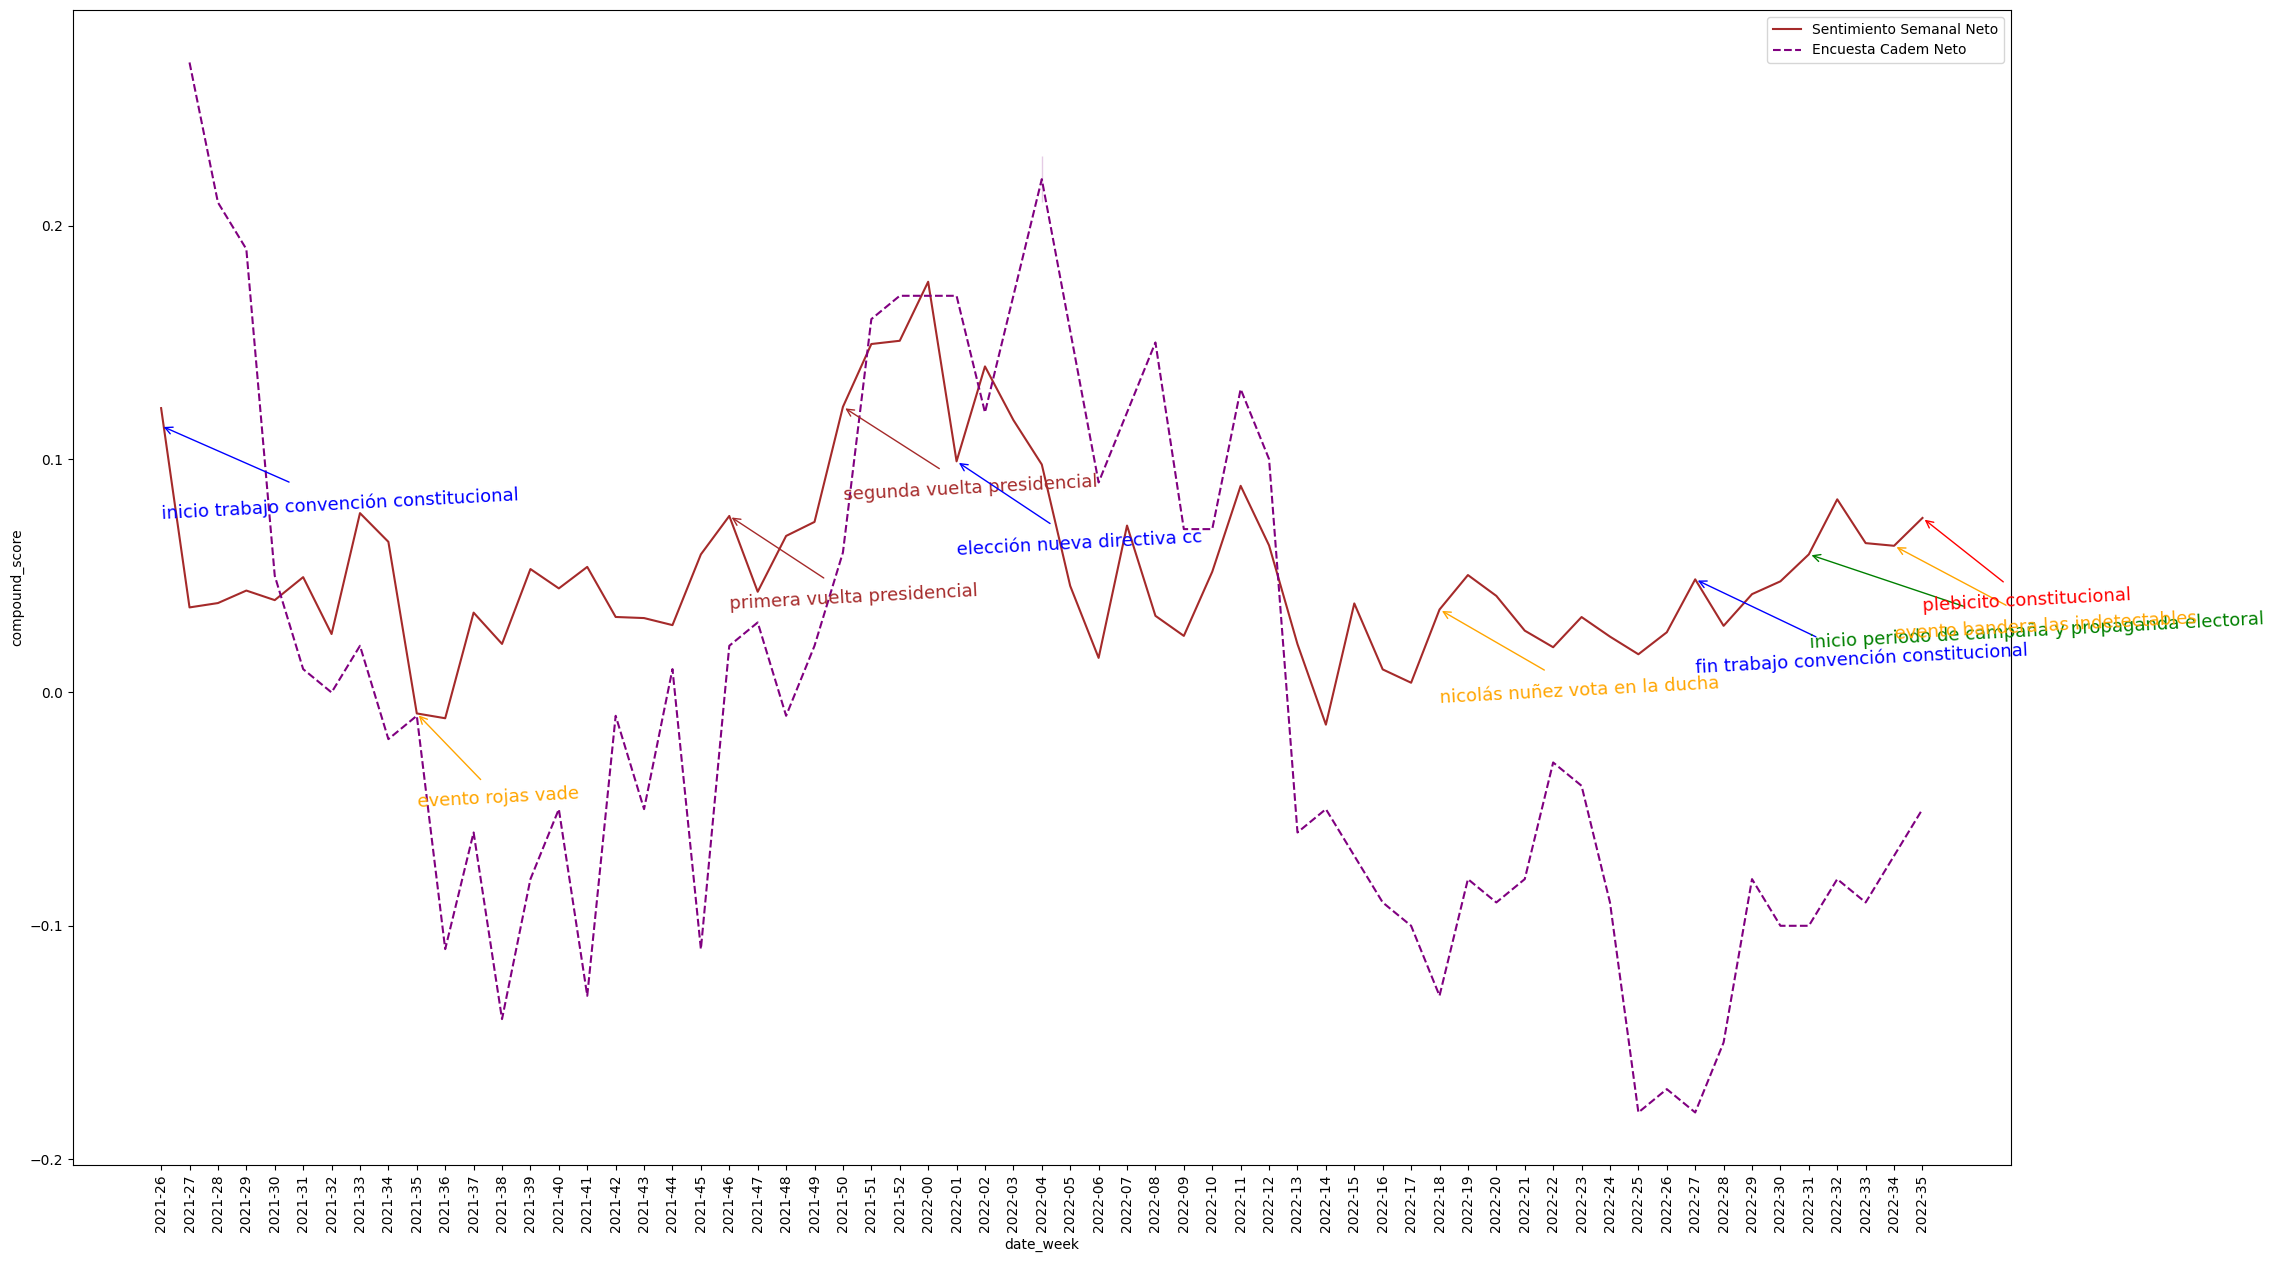

In [23]:
# plot sentimiento semanal

fecha_inicio = '2021-07-04'
fecha_fin = '2022-09-04'

avg_week = tweets[(tweets['date_day'] >= fecha_inicio) & (tweets['date_day'] <= fecha_fin)][['date_week', 'compound_score','negativity_score','positivity_score']].groupby('date_week').mean()

fig, ax = plt.subplots(figsize=(25, 15))
sns.lineplot(x=avg_week.index, y='compound_score', data=avg_week, ax=ax, color='brown', label='Sentimiento Semanal Neto')
sns.lineplot(x='week', y='Neto', data=encuesta_salida[(encuesta_salida['Fechaf'] >= fecha_inicio) & (encuesta_salida['Fechaf'] <= fecha_fin)], ax=ax, color='purple', linestyle='--', label='Encuesta Cadem Neto')

# agregar annotations
for i, row in fechas_relevantes[(fechas_relevantes['fecha'] >= fecha_inicio) & (fechas_relevantes['fecha'] <= fecha_fin)].iterrows():
	ax.annotate(row.evento, xy=(row.week, row.compound_score), xytext=(row.week, row.compound_score - 0.04), rotation = 3, color=row.colores, fontsize=13, arrowprops=dict(color=row.colores, arrowstyle="->"))

ax.set_xticklabels(avg_week.index.to_list(), rotation=90)

plt.savefig('sentimiento_semanal.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\alniquia\AppData\Local\Temp\ipykernel_10860\3412870387.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_week.index, rotation=90)


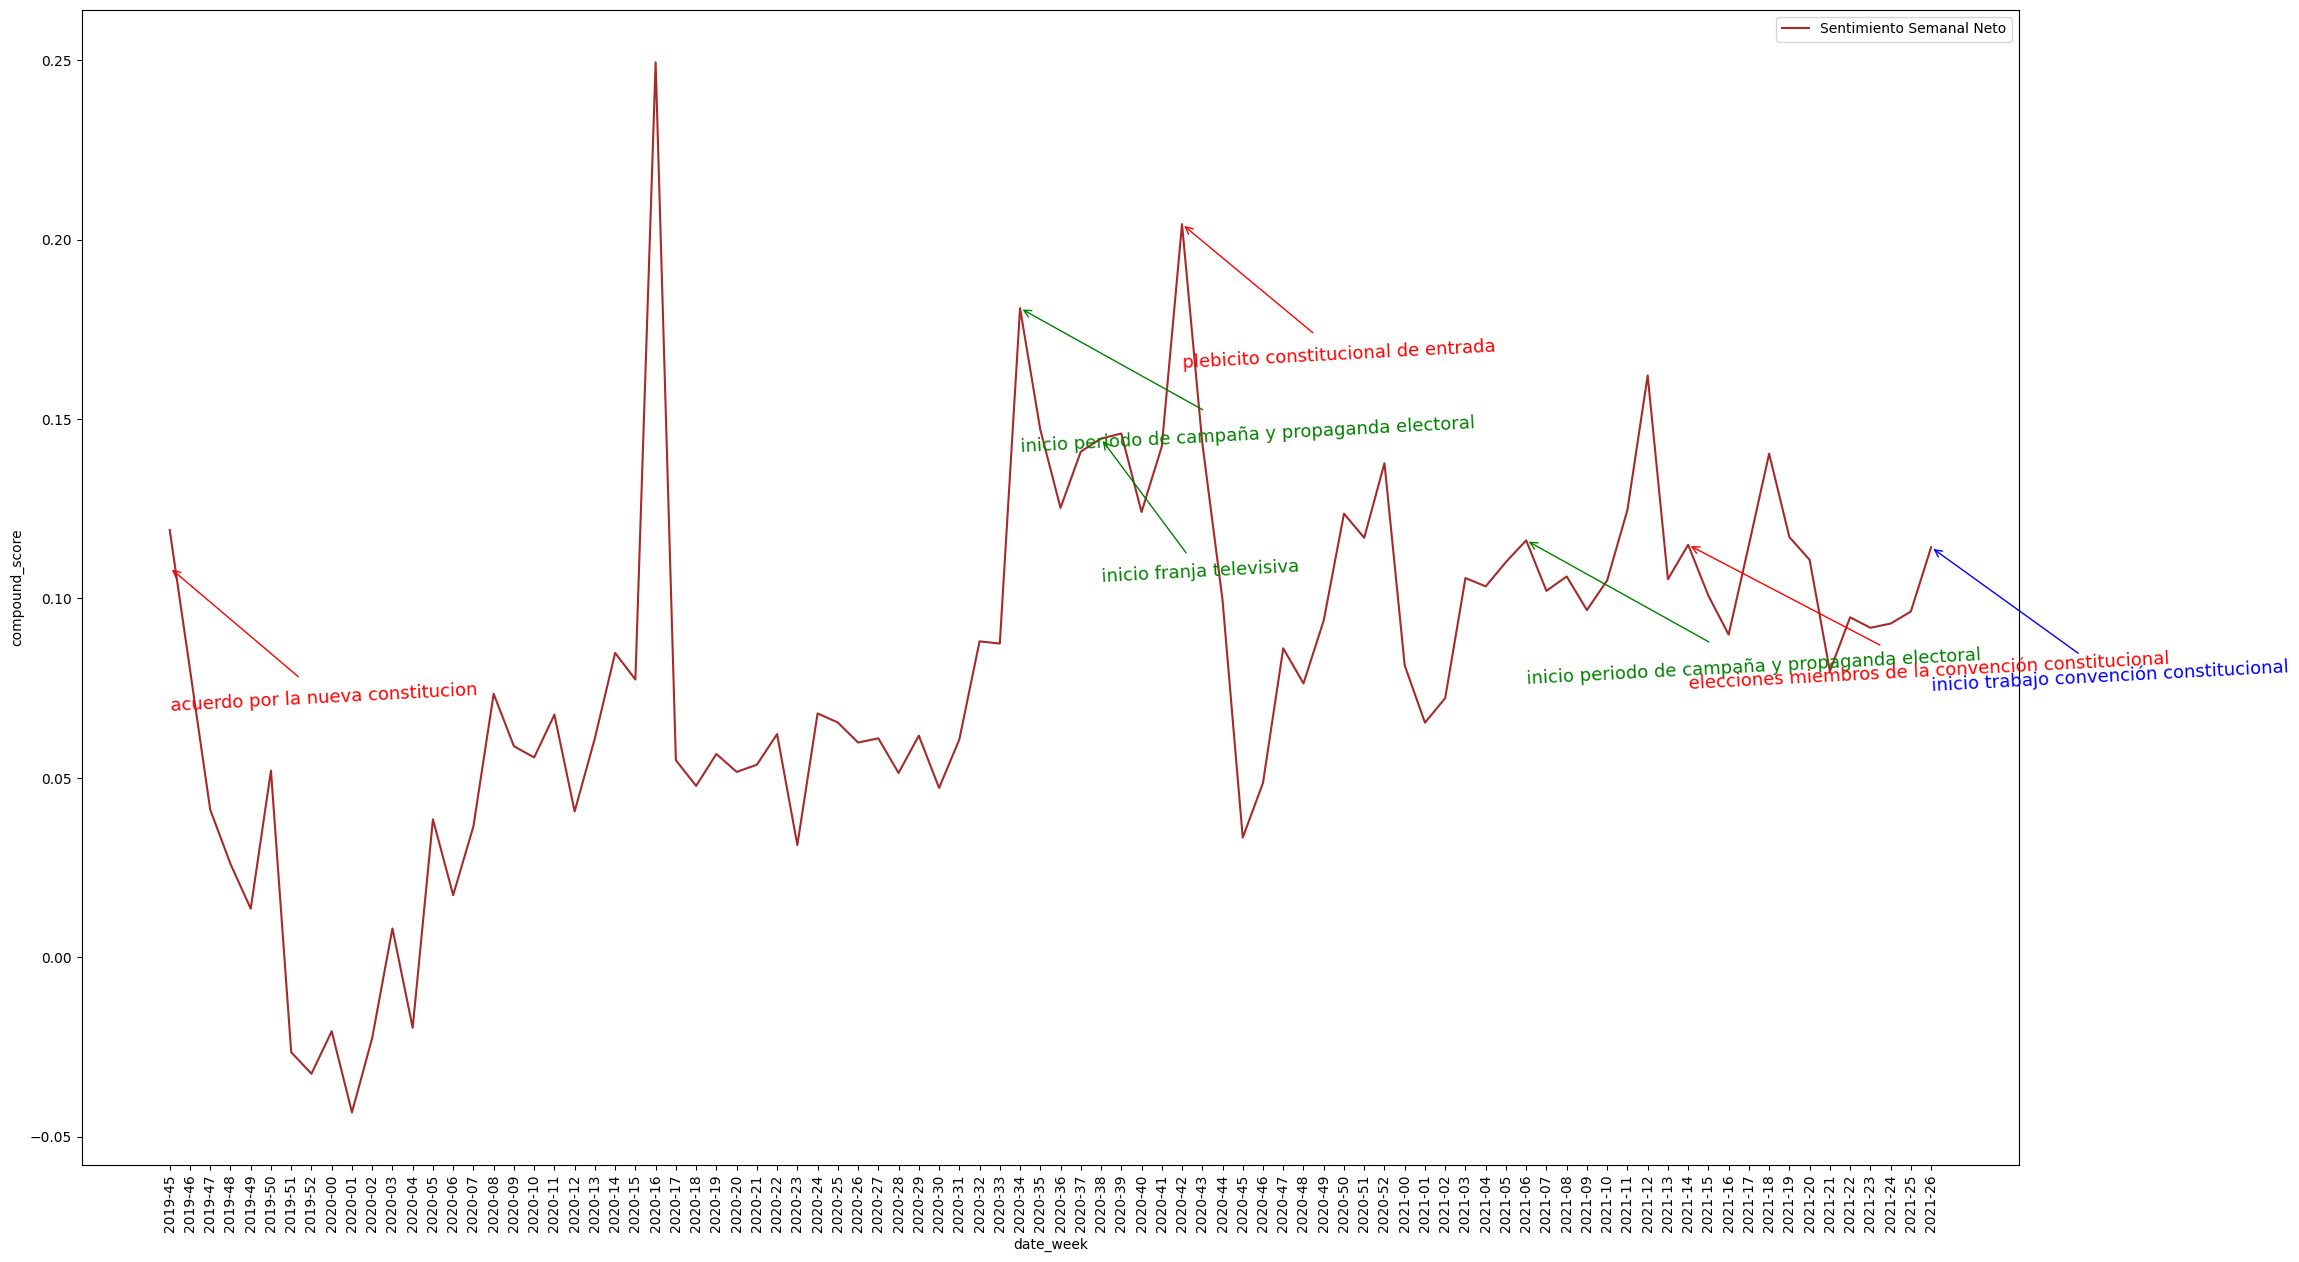

In [20]:
# plot sentimiento semanal

fecha_inicio = '2019-11-15'
fecha_fin = '2021-07-04'

avg_week = tweets[(tweets['date_day'] >= fecha_inicio) & (tweets['date_day'] <= fecha_fin)][['date_week', 'compound_score','negativity_score','positivity_score']].groupby('date_week').mean()

fig, ax = plt.subplots(figsize=(25, 15))
sns.lineplot(x=avg_week.index, y='compound_score', data=avg_week, ax=ax, color='brown', label='Sentimiento Semanal Neto')
# sns.lineplot(x='week', y='Neto', data=encuesta_salida[(encuesta_salida['Fechaf'] >= fecha_inicio) & (encuesta_salida['Fechaf'] <= fecha_fin)], ax=ax, color='purple', linestyle='--', label='Encuesta Cadem Neto')

# agregar annotations
for i, row in fechas_relevantes[(fechas_relevantes['fecha'] >= fecha_inicio) & (fechas_relevantes['fecha'] <= fecha_fin)].iterrows():
	ax.annotate(row.evento, xy=(row.week, row.compound_score), xytext=(row.week, row.compound_score - 0.04), rotation = 3, color=row.colores, fontsize=13, arrowprops=dict(color=row.colores, arrowstyle="->"))

ax.set_xticklabels(avg_week.index, rotation=90)

plt.savefig('sentimiento_semanal.png', dpi=300, bbox_inches='tight')

plt.show()

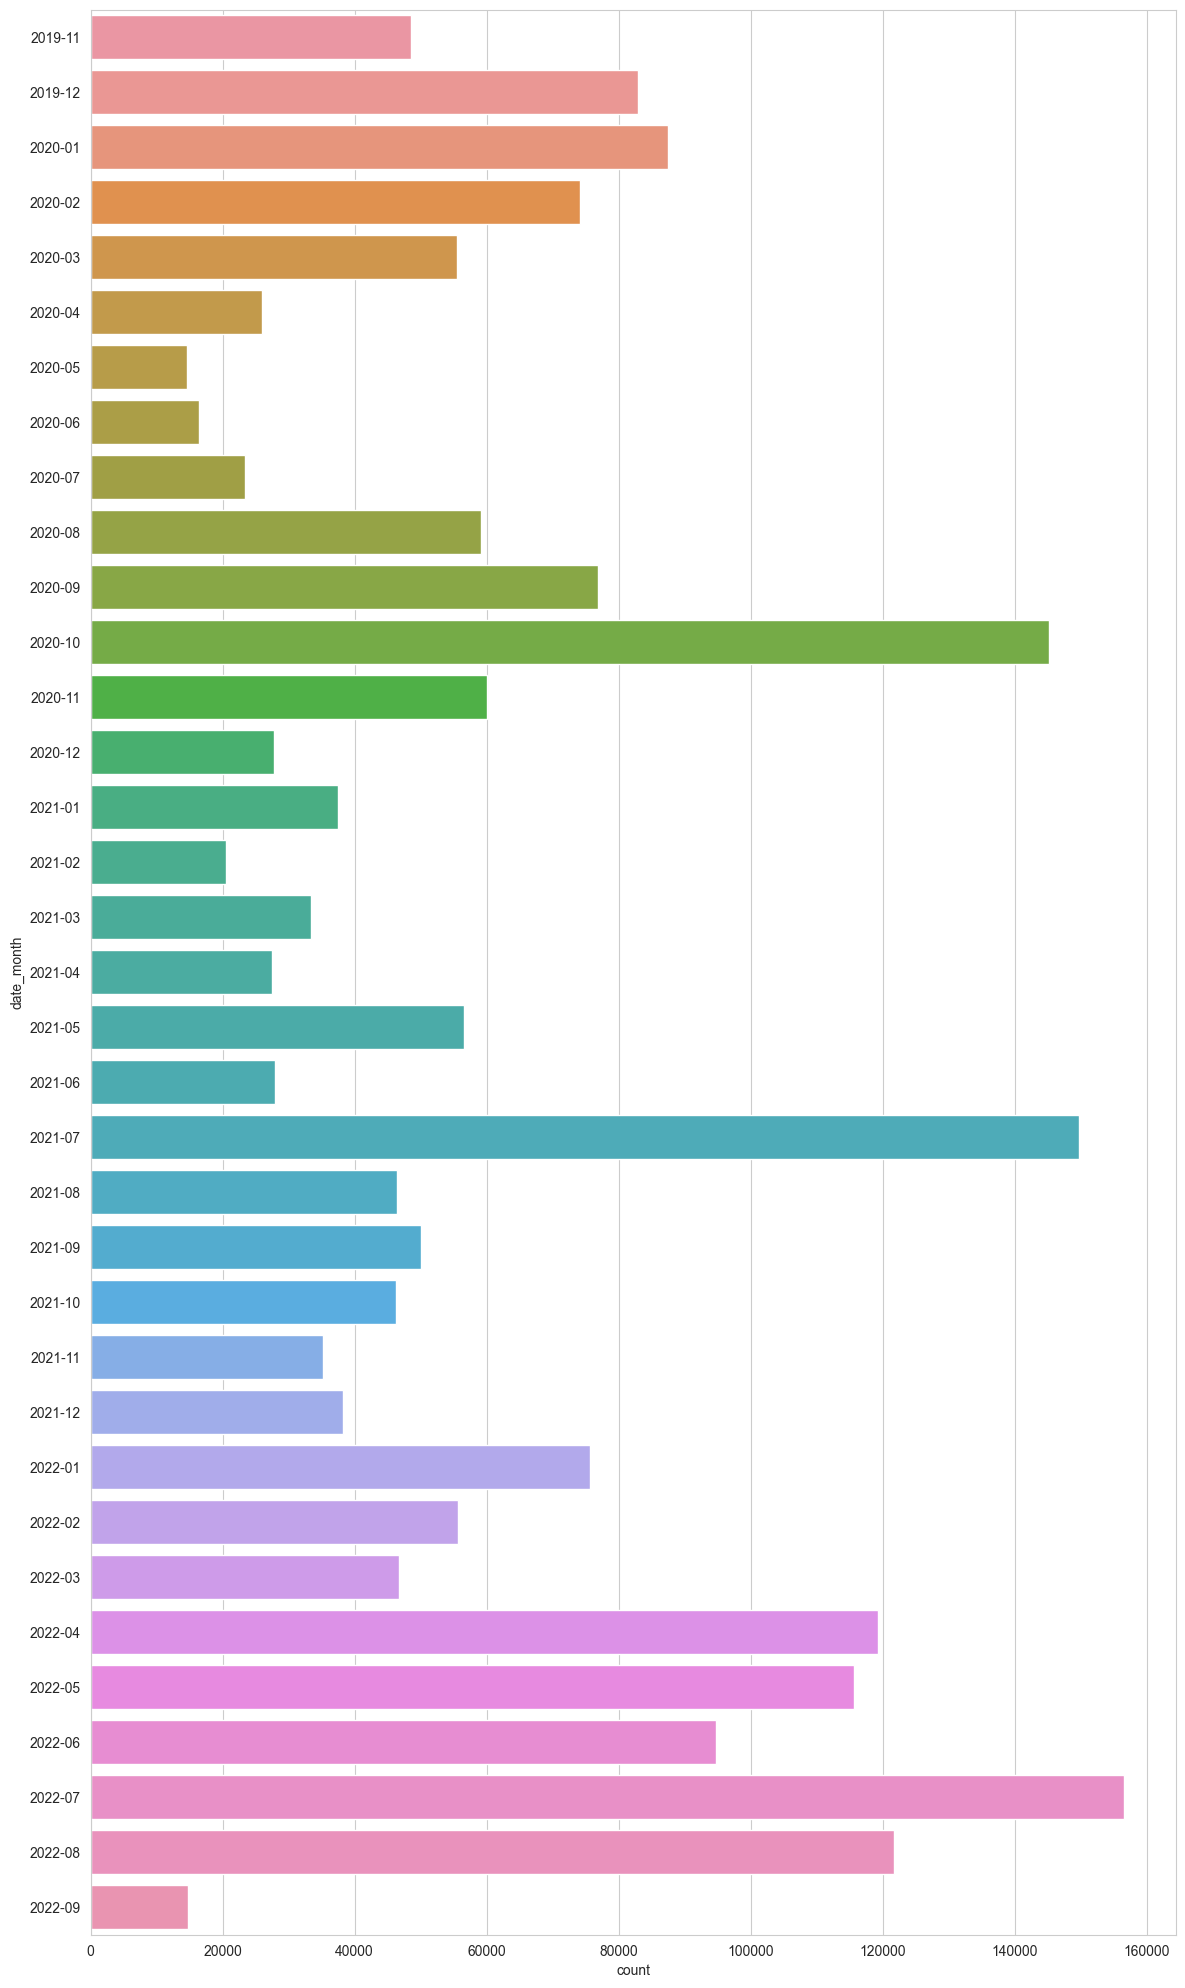

In [124]:
sns.set_style('whitegrid')
sns.set_palette("mako")

fig, ax = plt.subplots(figsize=(14, 14))
sns.countplot(y=tweets['date_month'], ax=ax)
plt.show()